In [1]:
from src.oxrivers_api.models.request_models import TimeseriesInfo, DataForDateInfo
from src.oxrivers_api.data_cache import DataCache
from src.oxrivers_api.data_loaders.json_to_pandas_loader import JsonToPandasLoader
from pathlib import Path
from pprint import pprint

import matplotlib

from src.oxrivers_api.api_to_json_client import APIToJson
from src.oxrivers_api.storage.json_storage import LocalJsonStorage

# choose where to store json locally
data_dir: Path = Path("../data")

# set up Oxford Rivers Client and Pandas loader
storage = LocalJsonStorage(data_dir)
client = APIToJson(storage)
loader = JsonToPandasLoader(client)

# Example usage to get and store time series data for fft in Oxford:
cache = DataCache(loader)
cache.get_timeseries(TimeseriesInfo("fft", "Oxford"))
cache.get_data_for_date(DataForDateInfo("rainfall", "2022-05-05"))

# list contents in cache
pprint(cache.contents())

Oxford
{'fft_Oxford_None': TimeseriesInfo(datasetID='fft',
                                   siteID='Oxford',
                                   determinand=None),
 'rainfall_2022_05_05': DataForDateInfo(datasetID='rainfall',
                                        date='2022-05-05')}


In [2]:
# display fft data
cache.get_by_key("fft_Oxford_None").head(10)

,datetime,value,qualifier,id,siteID,endPoint,determinand,determinand_label,determinand_unit
0,2023-01-01 00:00:00,1010.151184,None,fft,Oxford,getTimeseries,None,None,None
1,2023-01-01 00:15:00,1009.032837,None,fft,Oxford,getTimeseries,None,None,None
2,2023-01-01 00:30:00,1013.774902,None,fft,Oxford,getTimeseries,None,None,None
3,2023-01-01 00:45:00,1006.010498,None,fft,Oxford,getTimeseries,None,None,None
4,2023-01-01 01:00:00,1002.681274,None,fft,Oxford,getTimeseries,None,None,None
5,2023-01-01 01:15:00,1003.940369,None,fft,Oxford,getTimeseries,None,None,None
6,2023-01-01 01:30:00,988.663696,None,fft,Oxford,getTimeseries,None,None,None
7,2023-01-01 01:45:00,1007.169739,None,fft,Oxford,getTimeseries,None,None,None
8,2023-01-01 02:00:00,1031.859253,None,fft,Oxford,getTimeseries,None,None,None
9,2023-01-01 02:15:00,965.385010,None,fft,Oxford,getTimeseries,None,None,None


<Axes: xlabel='datetime'>

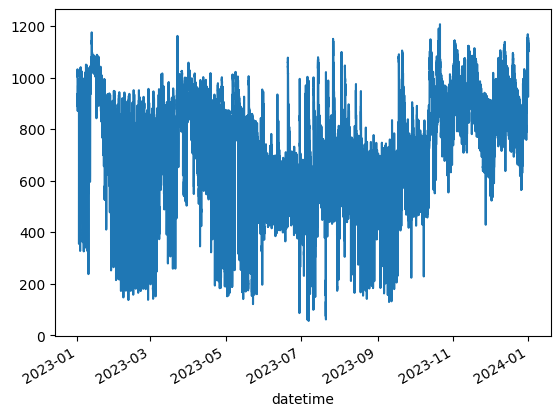

In [3]:
# plot fft data
cache.get_by_key("fft_Oxford_None").set_index('datetime', inplace=True)
cache.get_by_key("fft_Oxford_None")["value"].plot()

In [4]:
# display rainfall data
cache.get_by_key("rainfall_2022_05_05").head(10)

,datetime,value,id
0,2022-05-05,0.01,39001
1,2022-05-05,0.02,39002
2,2022-05-05,0.00,39003
3,2022-05-05,0.00,39004
4,2022-05-05,0.00,39005
5,2022-05-05,0.03,39006
6,2022-05-05,0.00,39007
7,2022-05-05,0.02,39008
8,2022-05-05,0.01,39009
9,2022-05-05,0.03,39010


In [5]:
# get max rainfall on the day
cache.get_by_key("rainfall_2022_05_05")["value"].max()

np.float64(0.14)